In [30]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
df = pd.read_csv("weather.csv", index_col = "DATE")

In [31]:
df

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1/1/1970,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/2/1970,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/3/1970,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
1/4/1970,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1/5/1970,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/17/2022,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,9.62,NaN,NaN,0.08,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/18/2022,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,12.08,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/19/2022,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,14.99,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.dtypes

STATION     object
NAME        object
ACMH       float64
ACSH       float64
AWND       float64
FMTM       float64
PGTM       float64
PRCP       float64
SNOW       float64
SNWD       float64
TAVG       float64
TMAX         int64
TMIN         int64
TSUN       float64
WDF1       float64
WDF2       float64
WDF5       float64
WDFG       float64
WDFM       float64
WESD       float64
WSF1       float64
WSF2       float64
WSF5       float64
WSFG       float64
WSFM       float64
WT01       float64
WT02       float64
WT03       float64
WT04       float64
WT05       float64
WT06       float64
WT07       float64
WT08       float64
WT09       float64
WT11       float64
WT13       float64
WT14       float64
WT15       float64
WT16       float64
WT17       float64
WT18       float64
WT21       float64
WT22       float64
WV01       float64
dtype: object

In [33]:
df.shape

(19287, 44)

In [34]:
null_pct = df.apply(pd.isnull).sum()/df.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.501478
ACSH       0.501426
AWND       0.265256
FMTM       0.475087
PGTM       0.363872
PRCP       0.000000
SNOW       0.000000
SNWD       0.000104
TAVG       0.680406
TMAX       0.000000
TMIN       0.000000
TSUN       0.998393
WDF1       0.501685
WDF2       0.498678
WDF5       0.502981
WDFG       0.734484
WDFM       0.999948
WESD       0.685228
WSF1       0.501530
WSF2       0.498678
WSF5       0.503033
WSFG       0.613055
WSFM       0.999948
WT01       0.630217
WT02       0.935034
WT03       0.933271
WT04       0.982579
WT05       0.981127
WT06       0.990615
WT07       0.994400
WT08       0.796962
WT09       0.992741
WT11       0.999274
WT13       0.886711
WT14       0.954010
WT15       0.997822
WT16       0.658993
WT17       0.996889
WT18       0.939493
WT21       0.999741
WT22       0.997459
WV01       0.999948
dtype: float64

In [35]:
valid_columns = df.columns[null_pct<.05]

In [36]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [37]:
df = df[valid_columns].copy()

In [38]:
df.columns = df.columns.str.lower()

In [39]:
df.apply(pd.isna).sum()

station    0
name       0
prcp       0
snow       0
snwd       2
tmax       0
tmin       0
dtype: int64

In [40]:
df.apply(lambda x: (x==9999).sum())

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [41]:
df = df.ffill()

In [42]:
df.columns

Index(['station', 'name', 'prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

In [43]:
df.index

Index(['1/1/1970', '1/2/1970', '1/3/1970', '1/4/1970', '1/5/1970', '1/6/1970',
       '1/7/1970', '1/8/1970', '1/9/1970', '1/10/1970',
       ...
       '10/12/2022', '10/13/2022', '10/14/2022', '10/15/2022', '10/16/2022',
       '10/17/2022', '10/18/2022', '10/19/2022', '10/20/2022', '10/21/2022'],
      dtype='object', name='DATE', length=19287)

In [44]:
df.index = pd.to_datetime(df.index)

In [45]:
df.index.year.value_counts().sort_index()

DATE
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    294
Name: count, dtype: int64

<Axes: xlabel='DATE'>

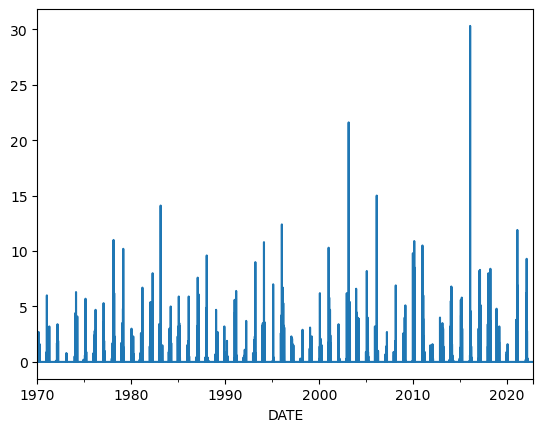

In [46]:
df["snow"].plot()

<Axes: xlabel='DATE'>

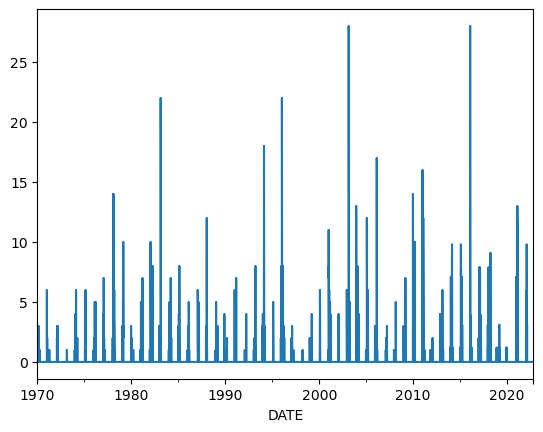

In [47]:
df["snwd"].plot()

In [48]:
df["target"] = df.shift(-1)["tmax"]

In [49]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=.1)

In [50]:
predictors = df.columns[~df.columns.isin(["target", "name", "station"])]

In [51]:
df.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
target     float64
dtype: object

In [52]:
df.head()

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0


In [53]:
def backtest(df, model, predictors, start=3650, step=90):

  all_predictions=[]



  for i in range(start, df.shape[0],step):

    train=df.iloc[:i,:]

    test=df.iloc[i:(i+step),:]



    model.fit(train[predictors],train["target"])



    preds=model.predict(test[predictors])

    preds=pd.Series(preds, index=test.index)

    combined=pd.concat([test["target"], preds], axis=1)

    combined.columns=["actual", "prediction"]

    combined["diff"]=(combined["prediction"]-combined["actual"]).abs()



    all_predictions.append(combined)

  return pd.concat(all_predictions)


In [54]:
predictions=backtest(df,rr,predictors)

In [55]:
df.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
target     float64
dtype: object

In [56]:
predictions.sort_values('diff', ascending=False)

,actual,prediction,diff
DATE,,,
2007-03-26,78.0,49.744725,28.255275
1999-01-02,53.0,25.911898,27.088102
1998-03-26,80.0,53.033957,26.966043
1985-04-18,84.0,57.071179,26.928821
1990-03-12,85.0,58.144310,26.855690
...,...,...,...
2019-03-01,40.0,40.002460,0.002460
1992-06-11,76.0,76.001641,0.001641
2011-09-16,66.0,66.000831,0.000831


In [57]:
pd.Series(rr.coef_,index=predictors)

prcp   -1.236110
snow   -0.407827
snwd    0.053422
tmax    0.447413
tmin    0.517302
dtype: float64

In [59]:
def pct_diff(old,new):

  return(new-old)/old



def compute_rolling(df, horizon, col):

  label=f"rolling_{horizon}_{col}"

  df[label]=df[col].rolling(horizon).mean()

  df[f"{label}_pct"]=pct_diff(df[label],df[col])

  return df



rolling_horizons=[3,14]

for horizon in rolling_horizons:

  for col in["tmax","tmin","prcp"]:

    df=compute_rolling(df, horizon, col)


In [60]:
def expand_mean(df):

  return df.expanding(1).mean()



for col in ["tmax","tmin", "prcp"]:

  df[f"month_avg_col{col}"]=df[col].groupby(df.index.month,group_keys=False).apply(expand_mean)

  df[f"day_avg_{col}"]=df[col].groupby(df.index.day_of_year,group_keys=False).apply(expand_mean)

In [61]:
df=df.iloc[14:,:]

df=df.fillna(0)

In [62]:
predictors=df.columns[~df.columns.isin(["target","name","station"])]

In [63]:
predictions=backtest(df,rr,predictors)

mean_absolute_error(predictions["actual"],predictions["prediction"])

4.796856548304589

In [64]:
mean_squared_error(predictions["actual"],predictions["prediction"])

37.871394287918875

In [65]:
df.loc["1990-03-07":"1990-03-17"]

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_coltmax,day_avg_tmax,month_avg_coltmin,day_avg_tmin,month_avg_colprcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1990-03-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,2.0,32,14,39.0,33.666667,-0.049505,...,25.000000,-0.440000,0.047857,-1.000000,48.590112,45.428571,34.567783,31.857143,0.119410,0.111429
1990-03-08,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,1.0,39,20,43.0,35.000000,0.114286,...,24.071429,-0.169139,0.040714,-1.000000,48.574841,46.571429,34.544586,31.190476,0.119220,0.076667
1990-03-09,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,43,29,47.0,38.000000,0.131579,...,22.785714,0.272727,0.031429,-0.681818,48.565978,45.619048,34.535771,30.952381,0.119046,0.036190
1990-03-10,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,47,39,59.0,43.000000,0.093023,...,23.428571,0.664634,0.020714,-0.517241,48.563492,43.809524,34.542857,31.761905,0.118873,0.071905
1990-03-11,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.05,0.0,0.0,59,41,59.0,49.666667,0.187919,...,25.500000,0.607843,0.021429,1.333333,48.580032,46.142857,34.553090,31.904762,0.118764,0.126667
1990-03-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,59,43,85.0,55.000000,0.072727,...,27.928571,0.539642,0.021429,-1.000000,48.596519,48.142857,34.566456,34.285714,0.118576,0.167619
1990-03-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,41,62.0,67.666667,0.256158,...,29.500000,0.389831,0.020000,-1.000000,48.654028,48.761905,34.576619,34.285714,0.118389,0.091429
1990-03-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,62,46,55.0,68.666667,-0.097087,...,30.857143,0.490741,0.020000,-1.000000,48.675079,50.190476,34.594637,36.809524,0.118202,0.259524
1990-03-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,55,43,62.0,67.333333,-0.183168,...,32.214286,0.334812,0.020000,-1.000000,48.685039,49.714286,34.607874,35.761905,0.118016,0.066667


<Axes: xlabel='diff'>

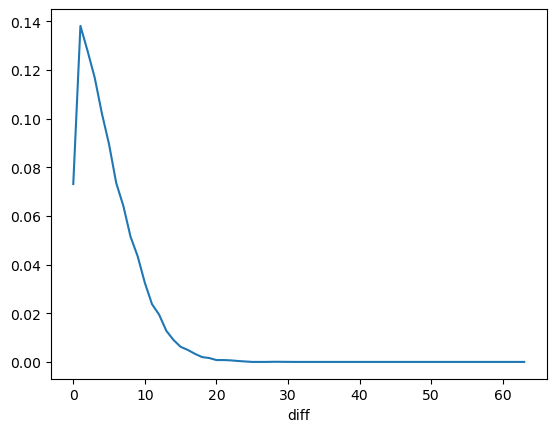

In [66]:
(predictions["diff"].round().value_counts().sort_index()/predictions.shape[0]).plot()

In [67]:
df.columns

Index(['station', 'name', 'prcp', 'snow', 'snwd', 'tmax', 'tmin', 'target',
       'rolling_3_tmax', 'rolling_3_tmax_pct', 'rolling_3_tmin',
       'rolling_3_tmin_pct', 'rolling_3_prcp', 'rolling_3_prcp_pct',
       'rolling_14_tmax', 'rolling_14_tmax_pct', 'rolling_14_tmin',
       'rolling_14_tmin_pct', 'rolling_14_prcp', 'rolling_14_prcp_pct',
       'month_avg_coltmax', 'day_avg_tmax', 'month_avg_coltmin',
       'day_avg_tmin', 'month_avg_colprcp', 'day_avg_prcp'],
      dtype='object')